# Risk Management - Problem Set 03
Authors:
- Dawid Włosek
- Julia Zezula

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats

## Problem 01

In [8]:
population_mean = 0
population_std = 1
N = 10                   # Sample size
num_trials = 100_000     

# Simulate samples
samples = np.random.normal(loc=population_mean, scale=population_std, size=(num_trials, N))

# Calculate sample mean for each trial
sample_means = np.mean(samples, axis=1, keepdims=True)

# Calculate unbiased sample variance
sample_variances_unbiased = np.sum((samples - sample_means) ** 2, axis=1) / (N - 1)

# Compute expected value
expected_sample_variance = np.mean(sample_variances_unbiased)

# Compare
true_variance = population_std ** 2

True population variance: 1.00000
Expected value of S^2_(N-1): 1.00157
Difference: 1.56703e-03


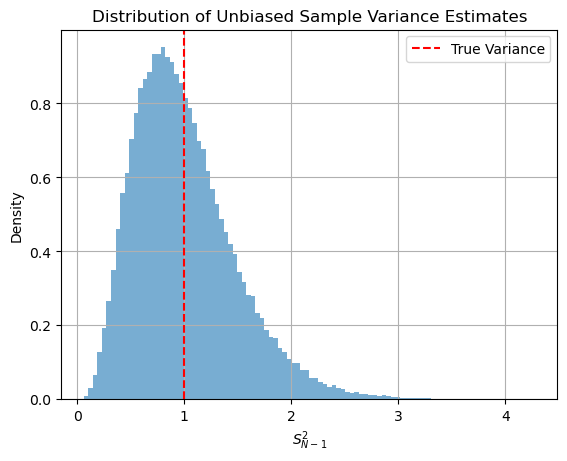

In [9]:
print(f"True population variance: {true_variance:.5f}")
print(f"Expected value of S^2_(N-1): {expected_sample_variance:.5f}")
print(f"Difference: {abs(expected_sample_variance - true_variance):.5e}")

plt.hist(sample_variances_unbiased, bins=100, density=True, alpha=0.6)
plt.axvline(true_variance, color='red', linestyle='--', label='True Variance')
plt.title("Distribution of Unbiased Sample Variance Estimates")
plt.xlabel(r"$S^2_{N-1}$")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Problem 02

In [2]:
def log_likelihood_lognormal(params, lognorm_data):
    scale, sigma_lognorm = params
    n = len(lognorm_data)

    ll = -n * np.log(sigma_lognorm) - n/2 * np.log(2 * np.pi) - \
        np.sum(np.log(lognorm_data)) - \
        np.sum((np.log(lognorm_data / scale) ** 2) / (2 * sigma_lognorm ** 2))

    return -ll

In [3]:
def lognormal_mle():
    print("MLE - Lognormal Distribution")


    true_scale = 2.0
    true_sigma_lognorm = 0.5
    n_samples = 1000
    np.random.seed(42)
    lognorm_data = np.random.lognormal(mean=np.log(true_scale), 
                                       sigma=true_sigma_lognorm, size=n_samples)

    initial_guess = [1.0, 1.0]
    mle_result = optimize.minimize(log_likelihood_lognormal, initial_guess,
                                   args=(lognorm_data,), method='Nelder-Mead')

    scale_mle, sigma_lognorm_mle = mle_result.x

    print("true params:")
    print(f"scale = {true_scale} sigma = {true_sigma_lognorm}")
    print("MLE estimates:")
    print(f"scale = {scale_mle:.4f} sigma = {sigma_lognorm_mle:.4f}")

    return lognorm_data, scale_mle, sigma_lognorm_mle

In [4]:
def linear_regression():
    print("\nLinear Regression vs Least Squares")
   
    np.random.seed(42)
    n_samples = 100
    true_slope = 2.0
    true_intercept = 1.0
    sigma_noise_true = 0.5

    x_reg = np.linspace(0, 10, n_samples)
    noise = np.random.normal(0, sigma_noise_true, n_samples)
    y_reg = true_slope * x_reg + true_intercept + noise

    X_design = np.vstack([x_reg, np.ones(len(x_reg))]).T
    slope_ls, intercept_ls = np.linalg.lstsq(X_design, y_reg, rcond=None)[0]

    def neg_log_likelihood_regression(params, x, y):
        slope, intercept, sigma_noise = params
        y_pred = slope * x + intercept
        return n_samples / 2 * np.log(2 * np.pi * sigma_noise ** 2) + \
               np.sum((y - y_pred) ** 2) / (2 * sigma_noise ** 2)

    mle_result = optimize.minimize(neg_log_likelihood_regression, [1.0, 1.0, 1.0],
                                   args=(x_reg, y_reg), method='Nelder-Mead')
    slope_mle, intercept_mle, sigma_noise_mle = mle_result.x

    print("ture params:")
    print(f"slope = {true_slope} intercept = {true_intercept}")
    print("least squares:")
    print(f"slope = {slope_ls:.4f} intercept = {intercept_ls:.4f}")
    print("mle estimates:")
    print(f"slope = {slope_mle:.4f} intercept = {intercept_mle:.4f}")

    return x_reg, y_reg, slope_ls, intercept_ls, slope_mle, intercept_mle

In [5]:
def plot_results(lognorm_data, scale_mle, sigma_lognorm_mle, x_reg, y_reg, slope_ls, intercept_ls):
    plt.figure(figsize=(12, 5))

    # Lognormal fit
    plt.subplot(121)
    plt.hist(lognorm_data, bins=50, density=True, alpha=0.7, label='Data', color="mediumseagreen")
    x_vals = np.linspace(min(lognorm_data), max(lognorm_data), 1000)
    y_vals = 1 / (x_vals * np.sqrt(2 * np.pi * sigma_lognorm_mle ** 2)) * \
             np.exp(-(np.log(x_vals / scale_mle) ** 2) / (2 * sigma_lognorm_mle ** 2))
    plt.plot(x_vals, y_vals, color='darkorange', label='fitted distribution')
    plt.title('Lognormal Distribution Fit')
    plt.legend()

    # Linear regression fit
    plt.subplot(122)
    plt.scatter(x_reg, y_reg, alpha=0.5, label='data', color='mediumseagreen')
    plt.plot(x_reg, slope_ls * x_reg + intercept_ls, label='Fitted Line (LS)', color="darkorange")
    plt.title('Linear Regression Fit')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [6]:
lognorm_data, scale_mle, sigma_lognorm_mle = lognormal_mle()

MLE - Lognormal Distribution
true params:
scale = 2.0 sigma = 0.5
MLE estimates:
scale = 2.0194 sigma = 0.4894


In [7]:
x_reg, y_reg, slope_ls, intercept_ls, slope_mle, intercept_mle = linear_regression()


Linear Regression vs Least Squares
ture params:
slope = 2.0 intercept = 1.0
least squares:
slope = 2.0069 intercept = 0.9136
mle estimates:
slope = 2.0069 intercept = 0.9136


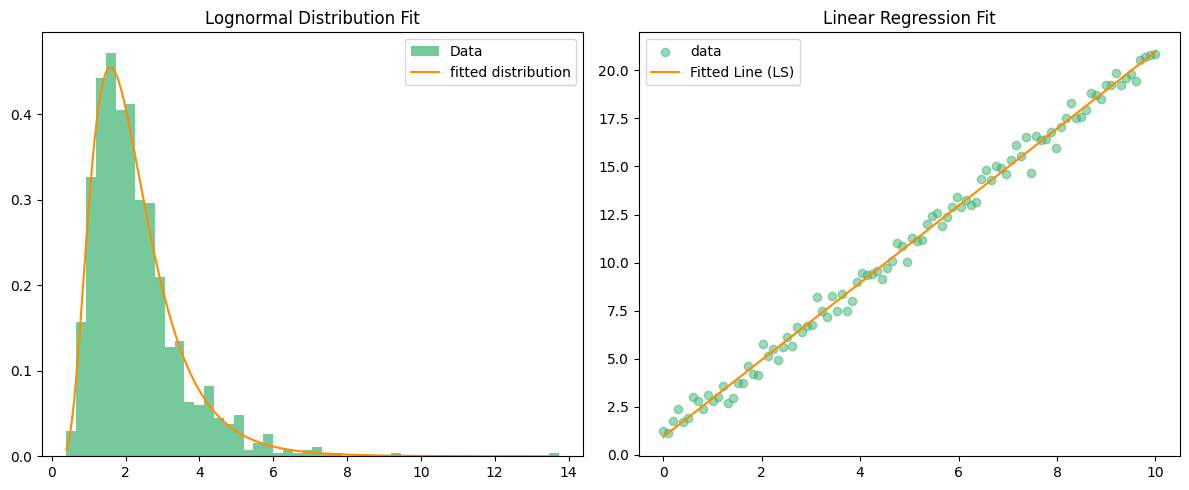

In [8]:
plot_results(lognorm_data, scale_mle, sigma_lognorm_mle, x_reg, y_reg, slope_ls, intercept_ls)

## Problem 3

In [9]:
def read_data(filename):
    with open(filename, 'r') as f:
        return np.array([float(line.strip()) for line in f])

In [ ]:
def correction_ks(u, N):
    return u + 1 / (6 * np.sqrt(N)) + (u - 1) / (4 * N)

In [ ]:
def run_ks_test(data, dist='norm', dist_args=(0, 1), correction=True):
    D, _ = stats.kstest(data, dist, args=dist_args)
    N = len(data)
    D_c = correction_ks(D, N) if correction else D
    p_value = stats.kstwobign.sf(D_c * np.sqrt(N))
    return D, D_c, p_value

In [ ]:
def run_ks_2sample_test(data1, data2, correction=True):
    D, _ = stats.ks_2samp(data1, data2)
    N = min(len(data1), len(data2))
    D_corrected = correction_ks(D, N) if correction else D
    p_value = stats.kstwobign.sf(D_corrected * np.sqrt(N / 2))
    return D, D_corrected, p_value

In [24]:
def print_test_result(label, D, D_c, p_value, alpha=0.05):
    print(f"\n{label}")
    print(f"D_N = {D:.6f}")
    print(f"Corrected D_N = {D_c:.6f}")
    print(f"p-value = {p_value:.6f}")
    print(f"Result: {'no' if p_value < alpha else 'yes'}")

In [25]:
alpha = 0.05
data_a = read_data('dat2a.txt')
data_b = read_data('dat2b.txt')

In [29]:
print("\nKolmogorov-Smirnov test when α = 0.05:")

D_a, D_a_corr, p_a = run_ks_test(data_a, dist='norm', dist_args=(5, 2))
print_test_result("does dat2a.txt come from N(5,2) distribution?", 
                  D_a, D_a_corr, p_a, alpha)


Kolmogorov-Smirnov test when α = 0.05:

does dat2a.txt come from N(5,2) distribution?
D_N = 0.029311
Corrected D_N = 0.039883
p-value = 0.908036
Result: yes


In [30]:
D_b, D_b_corr, p_b = run_ks_test(data_b, dist='norm', dist_args=(5, 2))
print_test_result("does dat2b.txt come from N(5,2) distribution?",
                   D_b, D_b_corr, p_b, alpha)


does dat2b.txt come from N(5,2) distribution?
D_N = 0.105858
Corrected D_N = 0.116525
p-value = 0.008755
Result: no


In [31]:

D_ab, D_ab_corr, p_ab = run_ks_2sample_test(data_a, data_b)
print_test_result("do dat2a.txt and dat2b.txt come from the same distribution?", 
                  D_ab, D_ab_corr, p_ab, alpha)


do dat2a.txt and dat2b.txt come from the same distribution?
D_N = 0.115000
Corrected D_N = 0.125679
p-value = 0.084927
Result: yes
